# Least Squares Method with Keras

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.<br>

Modified for local (off-line) mode with Python 3.x, TensorFlow 1.x (or 2.x), with or without GPU<br>
2020/02/04: By H.Nishiyama<br>

This notebook rewrite for local (off-line) TensorFlow 1.x (or 2.x).<br>
*If you use on online-colaboratory system, remove "###" from the top of lines in code cells. <br>
Original notebook uses TensorFlow 2.x.

In [1]:
###%tensorflow_version 2.x

####[LSM-01]
Import modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

from tensorflow.keras import layers, models

####[LSM-02]
Prepare the training dateset.

In [3]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(1, 5)]
                    for mon in range(1, 13)])

####[LSM-03]
`train_x` contains the list $[x, x^2, x^3, x^4]$ for $x=1,...,12$.

In [4]:
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

####[LSM-04]
`train_t` contins the corresponding lables for $x=1,...,12$.

In [5]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

####[LSM-05]
Define a model to predict labels using a polynomal function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [6]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(4,), name='polynomial'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


####[LSM-06]
Compile the model using the Adam optimizer, and MSE (Mean Square Error) as a loss function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [7]:
model.compile(optimizer='adam', loss='mse')

####[LSM-07]
Apply the optimization for 10 epochs.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [8]:
history = model.fit(train_x, train_t, batch_size=12, epochs=10)

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 0s 29ms/sample - loss: 25958656.0000
Epoch 2/10
12/12 [==============================] - 0s 0s/sample - loss: 25866566.0000
Epoch 3/10
12/12 [==============================] - 0s 254us/sample - loss: 25774638.0000
Epoch 4/10
12/12 [==============================] - 0s 431us/sample - loss: 25682882.0000
Epoch 5/10
12/12 [==============================] - 0s 83us/sample - loss: 25591304.0000
Epoch 6/10
12/12 [==============================] - 0s 286us/sample - loss: 25499894.0000
Epoch 7/10
12/12 [==============================] - 0s 149us/sample - loss: 25408666.0000
Epoch 8/10
12/12 [==============================] - 0s 468us/sample - loss: 25317624.0000
Epoch 9/10
12/12 [==============================] - 0s 360us/sample - loss: 25226760.0000
Epoch 10/10
12/12 [==============================] - 0s 335us/sample - loss: 25136090.0000


####[LSM-08]
Apply the optimization for additional 100,000 epochs.<br>
*Sometimes, very long time will be spent with execute following cell, about few minutes.

In [9]:
history = model.fit(train_x, train_t,
                    batch_size=12, epochs=100000, verbose=0)

####[LSM-09]
Plot charts to see how the loss has changed.

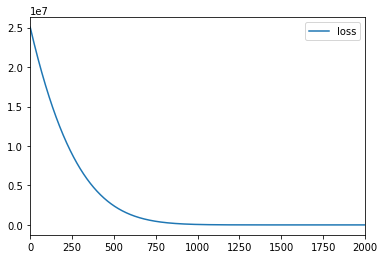

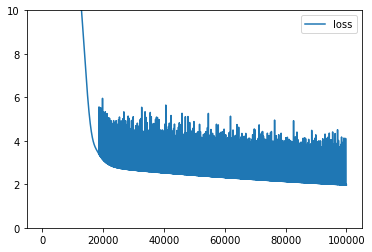

In [10]:
DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 2000))
DataFrame({'loss': history.history['loss']}).plot(ylim=(0, 10))

####[LSM-10]
Show weights after the training.

In [11]:
model.get_weights()

[array([[-0.7259539 ],
        [ 1.529607  ],
        [-0.17287415],
        [ 0.0043059 ]], dtype=float32), array([2.940069], dtype=float32)]

####[LSM-11]
Define a function to predict values using the final weights.

In [12]:
w, b = model.get_weights()
def predict(x):
    pred = b[0] + sum([w[n][0] * x**(n+1) for n in range(0, 4)])
    return pred

####[LSM-12]
Plot a chart for predictions.

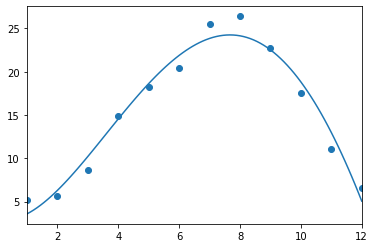

In [13]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)